In [24]:
import komm

In [25]:
# Open the file
with open("alice.txt", "r") as file:
    # Read the file
    text = file.read()
    # Create a dictionary to store the letters and their occurrences
    letters = {}
    # Iterate over the text
    for letter in text:
        # Check if the letter is a letter
        if letter.isalpha():
            # Check if the letter is in the dictionary
            if letter in letters:
                # Increment the value of the letter
                letters[letter] += 1
            else:
                # Add the letter to the dictionary
                letters[letter] = 1
    # Sort the dictionary by the keys
    sorted_letters = sorted(letters.items())

    # Print the result sorted by the number of occurrences
    for letter, occurrences in sorted(sorted_letters, key=lambda x: x[1], reverse=True):
        print(f"{letter}: {occurrences}")

    

e: 15287
t: 11740
o: 9372
a: 9167
n: 7935
i: 7856
h: 7677
s: 7041
r: 6491
d: 5272
l: 5102
u: 3921
c: 2846
g: 2768
w: 2745
y: 2503
f: 2255
m: 2210
p: 1795
b: 1635
k: 1217
v: 943
I: 784
A: 670
T: 482
H: 245
S: 229
W: 226
j: 223
D: 206
M: 196
E: 193
G: 182
C: 181
P: 180
x: 170
R: 165
O: 146
q: 139
N: 136
F: 123
B: 118
L: 111
Y: 100
Q: 84
K: 81
z: 78
U: 70
V: 26
J: 13
X: 10
Z: 1
ù: 1


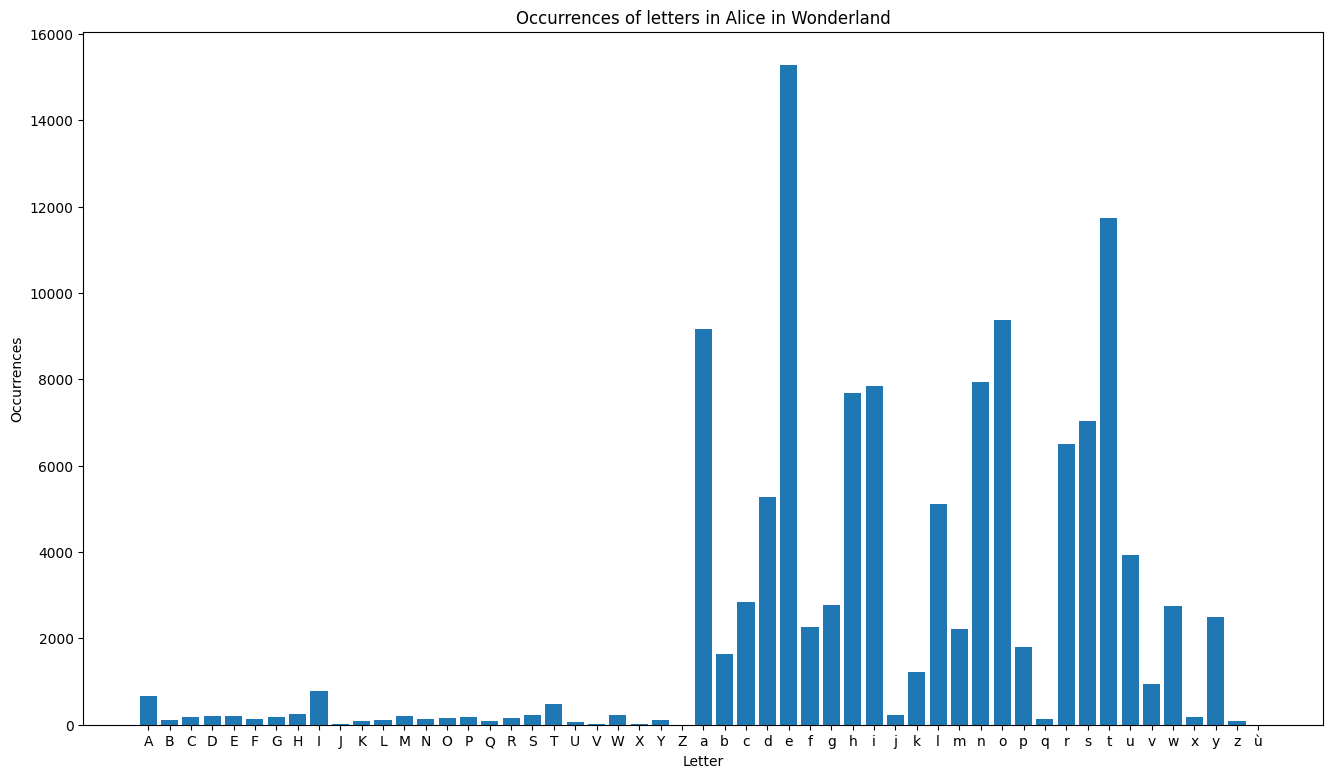

In [26]:
# Create a graph with the results, letters in the x-axis and occurrences in the y-axis

import matplotlib.pyplot as plt

# Get the letters and occurrences
letters = [letter for letter, occurrences in sorted_letters]

occurrences = [occurrences for letter, occurrences in sorted_letters]

# Create the graph

plt.figure(figsize=(16,9))
plt.bar(letters, occurrences)

plt.xlabel("Letter")

plt.ylabel("Occurrences")

plt.title("Occurrences of letters in Alice in Wonderland")

plt.show()


Total letters: 123347


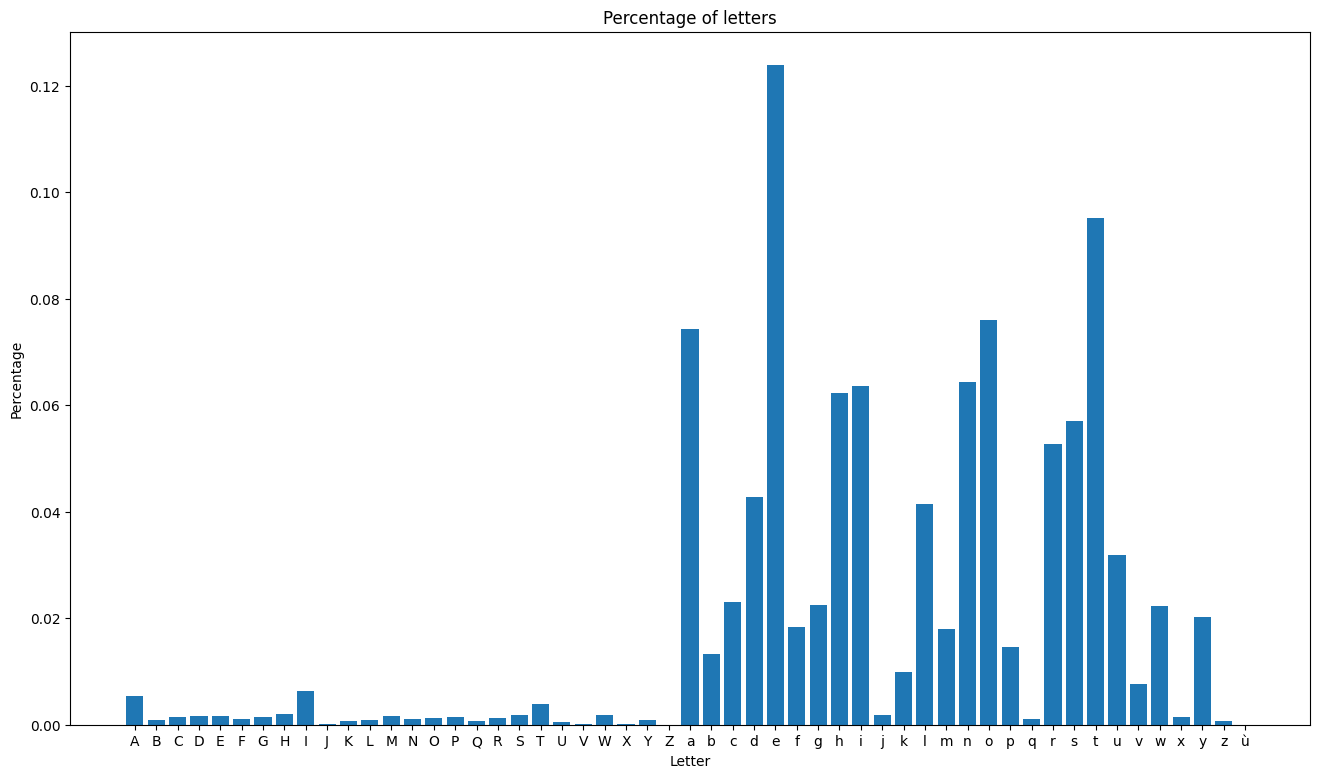

In [27]:
# sum all the occurrences of the letters and create a graph with the percentage of each letter

# Get the total number of letters

total_letters = sum(occurrences)

print("Total letters:", total_letters)

# Calculate the percentage of each letter

def percentage(occurrences, total):
    return [occurrence / total for occurrence in occurrences]

percentages = percentage(occurrences, total_letters)

# Create the gprint("Letters:", letters)raph
plt.figure(figsize=(16,9))
plt.bar(letters, percentages)

plt.xlabel("Letter")

plt.ylabel("Percentage")

plt.title("Percentage of letters")

plt.show()

In [35]:
# create a pmf vector with the percentage of each letter

pmf = {letter: percentage for letter, percentage in zip(letters, percentages)}

print("PMF:", list(pmf.values()))

huff = komm.HuffmanCode(list(pmf.values()))

print("Huffman code:", huff.codewords)

print("Huff Ratio:", huff.rate(list(pmf.values())))

PMF: [0.005431830526887561, 0.0009566507495115406, 0.0014674049632338038, 0.0016700852067743845, 0.0015646914801332825, 0.0009971867982196568, 0.001475512172975427, 0.0019862663866976903, 0.006356052437432608, 0.00010539372664110193, 0.0006566839890714813, 0.000899900281320178, 0.001589013109358152, 0.0011025805248607587, 0.0011836526222769909, 0.0014592977534921806, 0.0006810056182963509, 0.0013376896073678322, 0.0018565510308317186, 0.003907675095462394, 0.0005675046819136258, 0.00021078745328220386, 0.001832229401606849, 8.107209741623225e-05, 0.0008107209741623225, 8.107209741623226e-06, 0.07431879170146011, 0.013255287927553974, 0.0230731189246597, 0.04274120975783764, 0.12393491532019425, 0.018281757967360375, 0.022440756564813088, 0.062239049186441506, 0.06369023973019206, 0.0018079077723819792, 0.009866474255555466, 0.041362984101761695, 0.01791693352898733, 0.0643307092997803, 0.07598076969849286, 0.01455244148621369, 0.0011269021540856283, 0.052623898432876355, 0.057082863790

In [44]:
# create a index of PMF, using number and the letter:

index = {i: letter for i, letter in enumerate(letters)}

print ("Index:", index)

Index: {0: 'A', 1: 'B', 2: 'C', 3: 'D', 4: 'E', 5: 'F', 6: 'G', 7: 'H', 8: 'I', 9: 'J', 10: 'K', 11: 'L', 12: 'M', 13: 'N', 14: 'O', 15: 'P', 16: 'Q', 17: 'R', 18: 'S', 19: 'T', 20: 'U', 21: 'V', 22: 'W', 23: 'X', 24: 'Y', 25: 'Z', 26: 'a', 27: 'b', 28: 'c', 29: 'd', 30: 'e', 31: 'f', 32: 'g', 33: 'h', 34: 'i', 35: 'j', 36: 'k', 37: 'l', 38: 'm', 39: 'n', 40: 'o', 41: 'p', 42: 'q', 43: 'r', 44: 's', 45: 't', 46: 'u', 47: 'v', 48: 'w', 49: 'x', 50: 'y', 51: 'z', 52: 'ù'}


In [49]:
# encode the text using the index to create a integer index of the letters in the text

encoded_text = [list(index.keys())[list(index.values()).index(letter)] for letter in text if letter.isalpha()]

print("Encoded text:", encoded_text)

# create a huffman code for the encoded text

huff_encoded = huff.encode(encoded_text)

print("Huffman encoded text:", huff_encoded)

Encoded text: [19, 33, 30, 15, 43, 40, 35, 30, 28, 45, 6, 46, 45, 30, 39, 27, 30, 43, 32, 30, 1, 40, 40, 36, 40, 31, 0, 37, 34, 28, 30, 44, 0, 29, 47, 30, 39, 45, 46, 43, 30, 44, 34, 39, 22, 40, 39, 29, 30, 43, 37, 26, 39, 29, 19, 33, 34, 44, 30, 27, 40, 40, 36, 34, 44, 31, 40, 43, 45, 33, 30, 46, 44, 30, 40, 31, 26, 39, 50, 40, 39, 30, 26, 39, 50, 48, 33, 30, 43, 30, 34, 39, 45, 33, 30, 20, 39, 34, 45, 30, 29, 18, 45, 26, 45, 30, 44, 26, 39, 29, 38, 40, 44, 45, 40, 45, 33, 30, 43, 41, 26, 43, 45, 44, 40, 31, 45, 33, 30, 48, 40, 43, 37, 29, 26, 45, 39, 40, 28, 40, 44, 45, 26, 39, 29, 48, 34, 45, 33, 26, 37, 38, 40, 44, 45, 39, 40, 43, 30, 44, 45, 43, 34, 28, 45, 34, 40, 39, 44, 48, 33, 26, 45, 44, 40, 30, 47, 30, 43, 24, 40, 46, 38, 26, 50, 28, 40, 41, 50, 34, 45, 32, 34, 47, 30, 34, 45, 26, 48, 26, 50, 40, 43, 43, 30, 46, 44, 30, 34, 45, 46, 39, 29, 30, 43, 45, 33, 30, 45, 30, 43, 38, 44, 40, 31, 45, 33, 30, 15, 43, 40, 35, 30, 28, 45, 6, 46, 45, 30, 39, 27, 30, 43, 32, 11, 34, 28, 30

In [ ]:
# export the huffman code to a file

with open("huff_encoded.com2", "w") as file:
    file.write("".join(map(str, huff_encoded)))

In [53]:
# read the huffman code from the file

with open("huff_encoded.com2", "r") as file:
    huff_encoded = file.read()

print("Huffman encoded text from file:", huff_encoded)


Huffman encoded text from file: 00000001011011110001011111000111000000100101011101010001000001011101101010100111101100010101110001101010111100000001110100010000111101100001111101011101011011100010100111000010101110101100000000101111011010010101000111110000111001011000000110110001011011001110001101101100110110110000000001011011100000011110001010100010000111101110000001011111100000011010011011111010100001111100001111110011011011101100010111111001101101110101011011011110001111111001011010011011110000000010001011110001001110110000000011000100100101001110000110011011011001010011000000010100100001001101111000110001000100100011010000001100001111101001101111010110100000011011010110010010100101110000101001000000010100100110110110001011011000100110110010110110100110000000101001011100000011111000010100000111100010100010011001000101100001010110110110010100000011000111000000101110001100010010111100010101101001100101110101010010000001000011101110001000101011100000000101111100010010010101101001011101